In [10]:
# Data Processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_and_clean_data(file_path):
    # Load the dataset from the provided file path
    data = pd.read_csv(file_path)

    # Initial data cleaning
    data.drop_duplicates(inplace=True)

    # Encode categorical columns
    categorical_columns = ['job', 'marital', 'education', 'default',
                           'housing', 'loan', 'contact', 'month', 'poutcome']
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        data[col] = label_encoder.fit_transform(data[col])

    # Convert target variable to binary (0 and 1)
    data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

    # Split features and target variable
    X = data.drop('deposit', axis=1)
    y = data['deposit']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train.to_numpy(), y_test.to_numpy(), data

# Example usage
file_path = 'https://drive.google.com/uc?id=1szHliSIUmyKnQRBPTJ2OMqBYejgAdaQ9'
X_train, X_test, y_train, y_test, original_data = load_and_clean_data(file_path)
print("Data preprocessed and split into training and testing sets.")


Data preprocessed and split into training and testing sets.


In [11]:
# Model Training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape based on the features
input_shape = X_train.shape[1]
model = create_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
model.save('bank_marketing_model.h5')
print("Model trained and saved successfully.")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6987 - loss: 0.5780 - val_accuracy: 0.7956 - val_loss: 0.4541
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8108 - loss: 0.4232 - val_accuracy: 0.8163 - val_loss: 0.4250
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.4304 - val_accuracy: 0.8175 - val_loss: 0.4227
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.4048 - val_accuracy: 0.8163 - val_loss: 0.4222
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.3998 - val_accuracy: 0.8191 - val_loss: 0.4165
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.3949 - val_accuracy: 0.8147 - val_loss: 0.4176
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.3932 - val_accuracy: 0.8208 - val_loss: 0.4171
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.3921 - val_accuracy: 0.8242 - val_

Model trained and saved successfully.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8083296014330497

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1166
           1       0.77      0.86      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



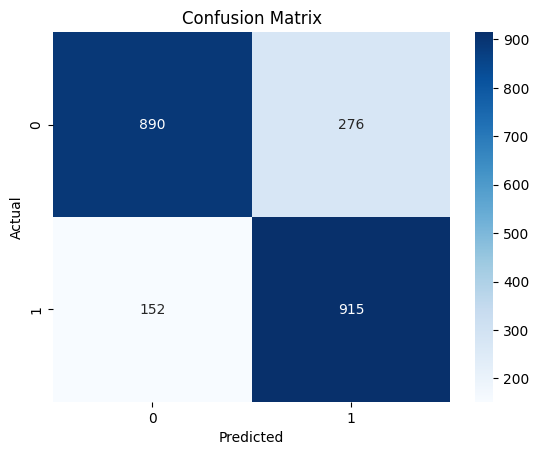

In [12]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(X_test, y_test):
    model = tf.keras.models.load_model('bank_marketing_model.h5')
    predictions = model.predict(X_test)
    binary_predictions = (predictions > 0.5).astype('int')

    accuracy = accuracy_score(y_test, binary_predictions)
    print(f"Accuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_test, binary_predictions))

    cm = confusion_matrix(y_test, binary_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')
    plt.show()

# Evaluate the model
evaluate_model(X_test, y_test)


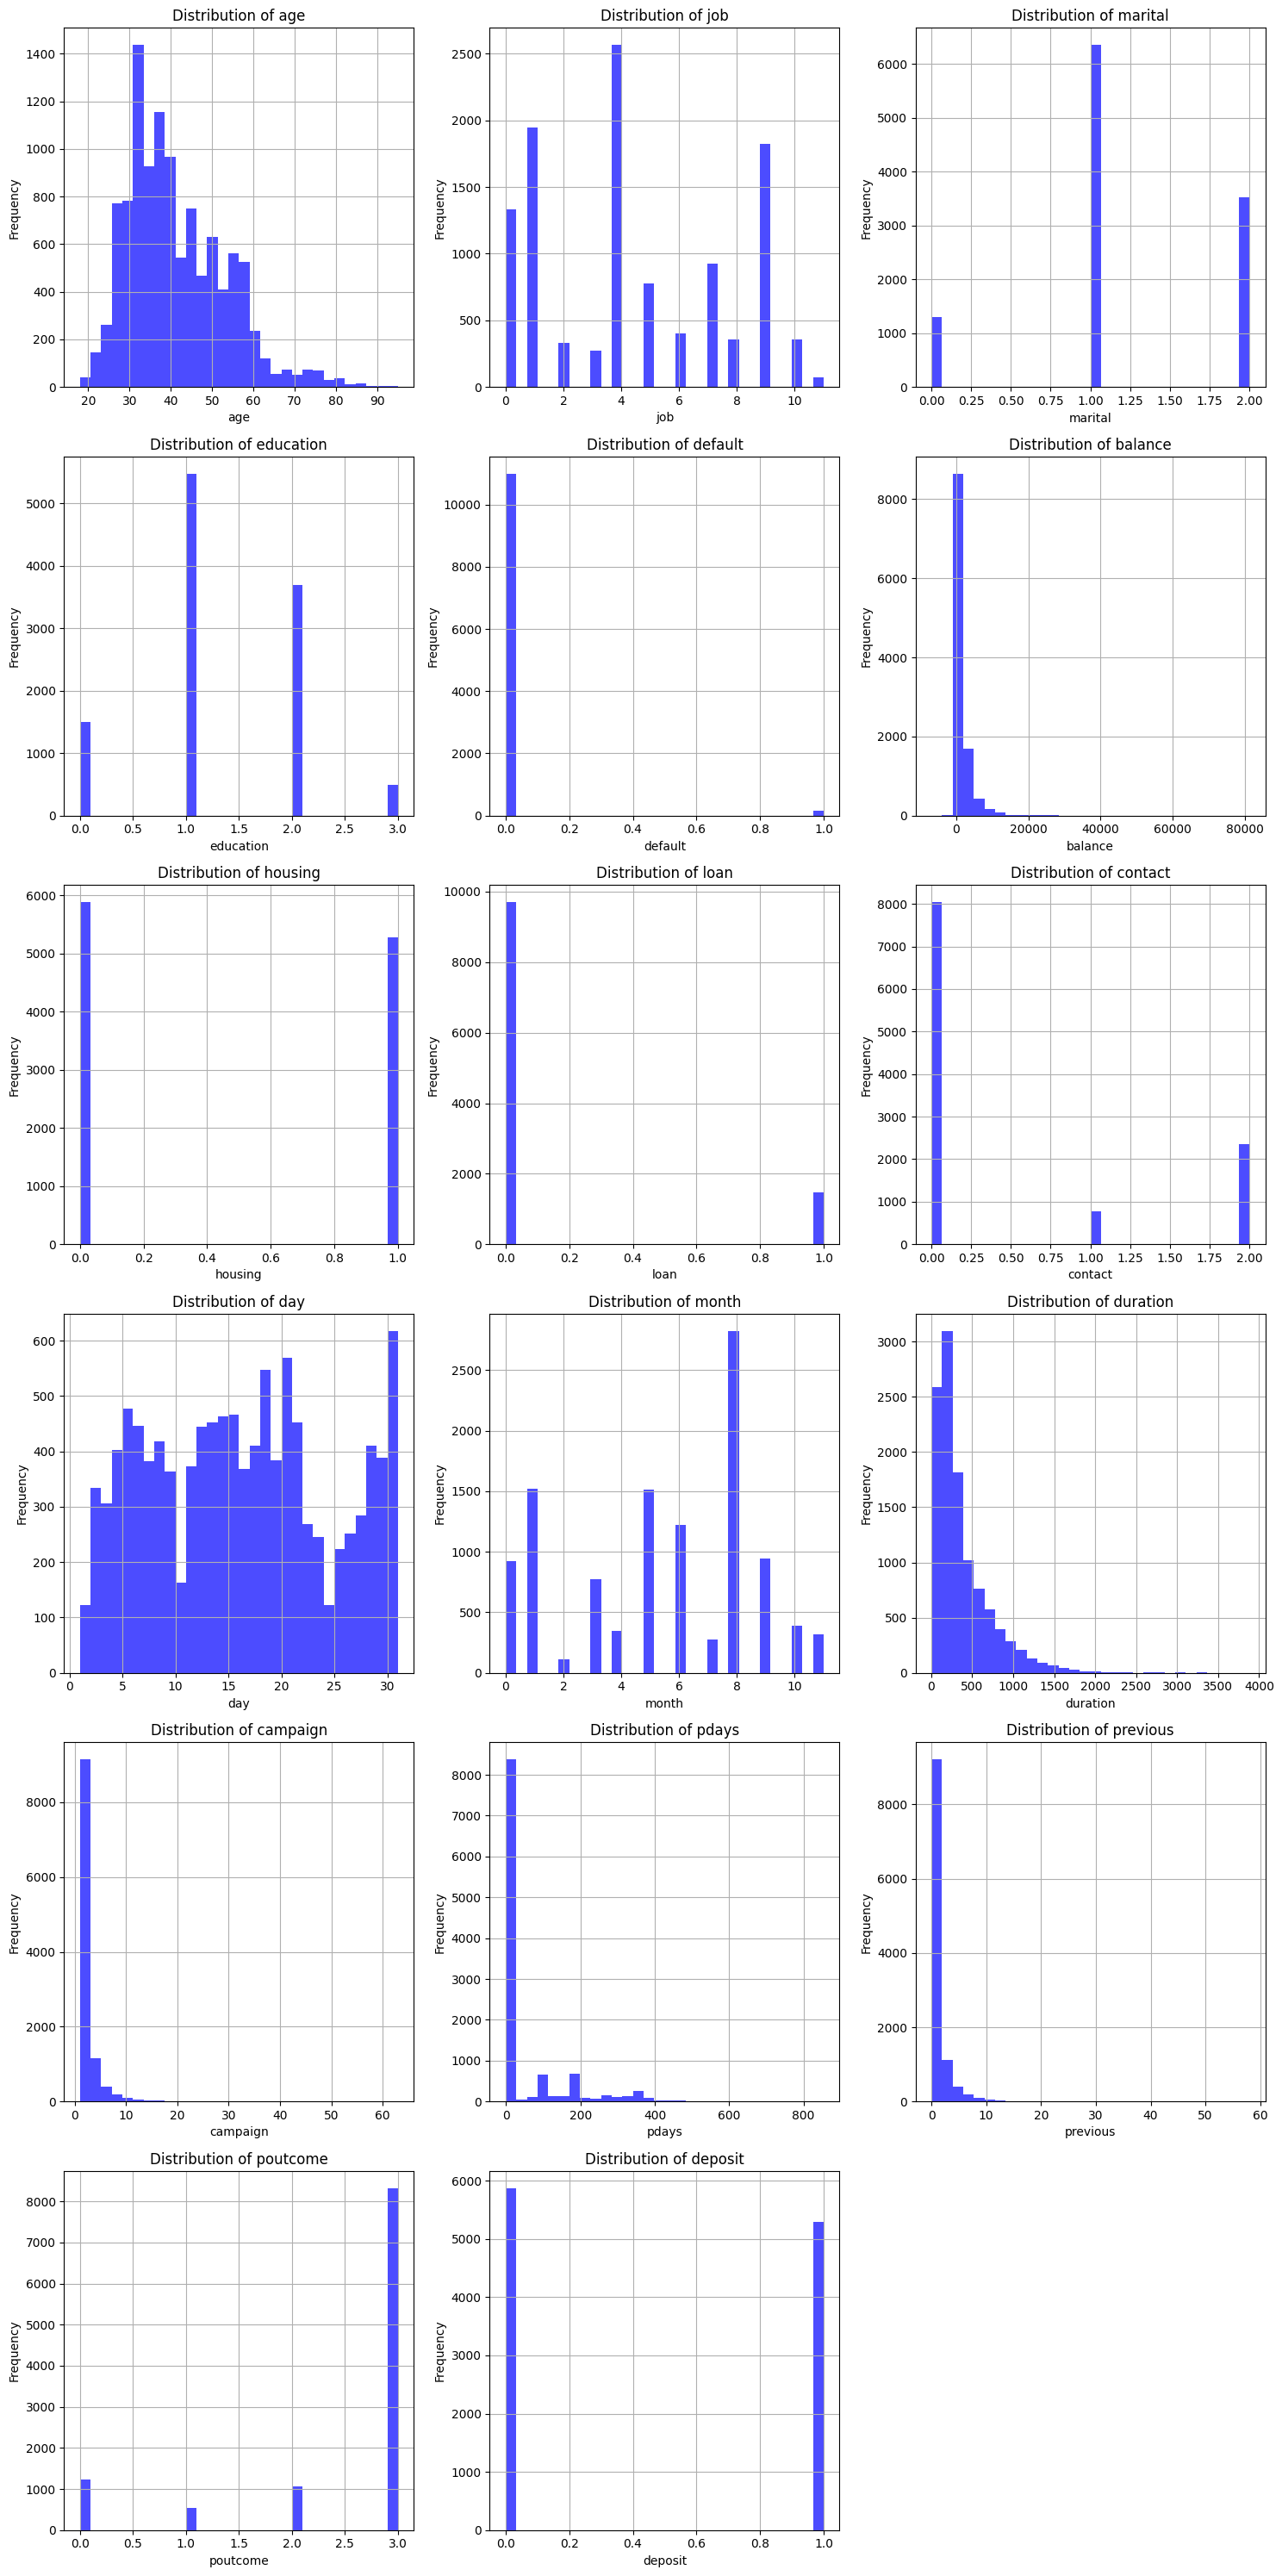

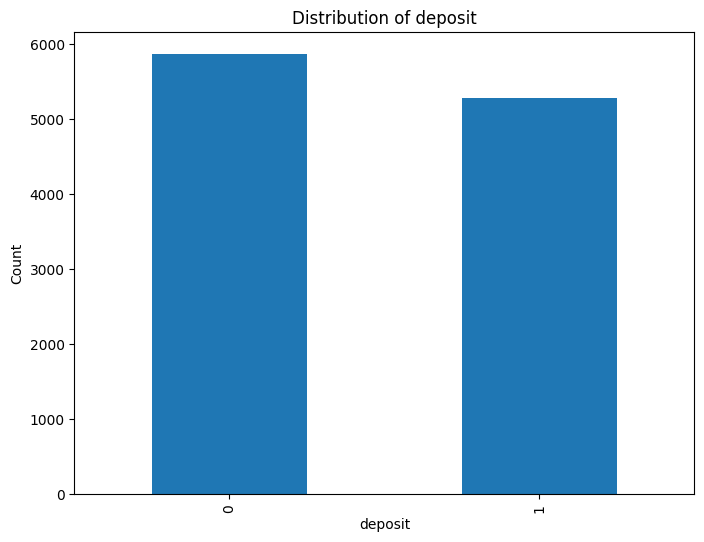

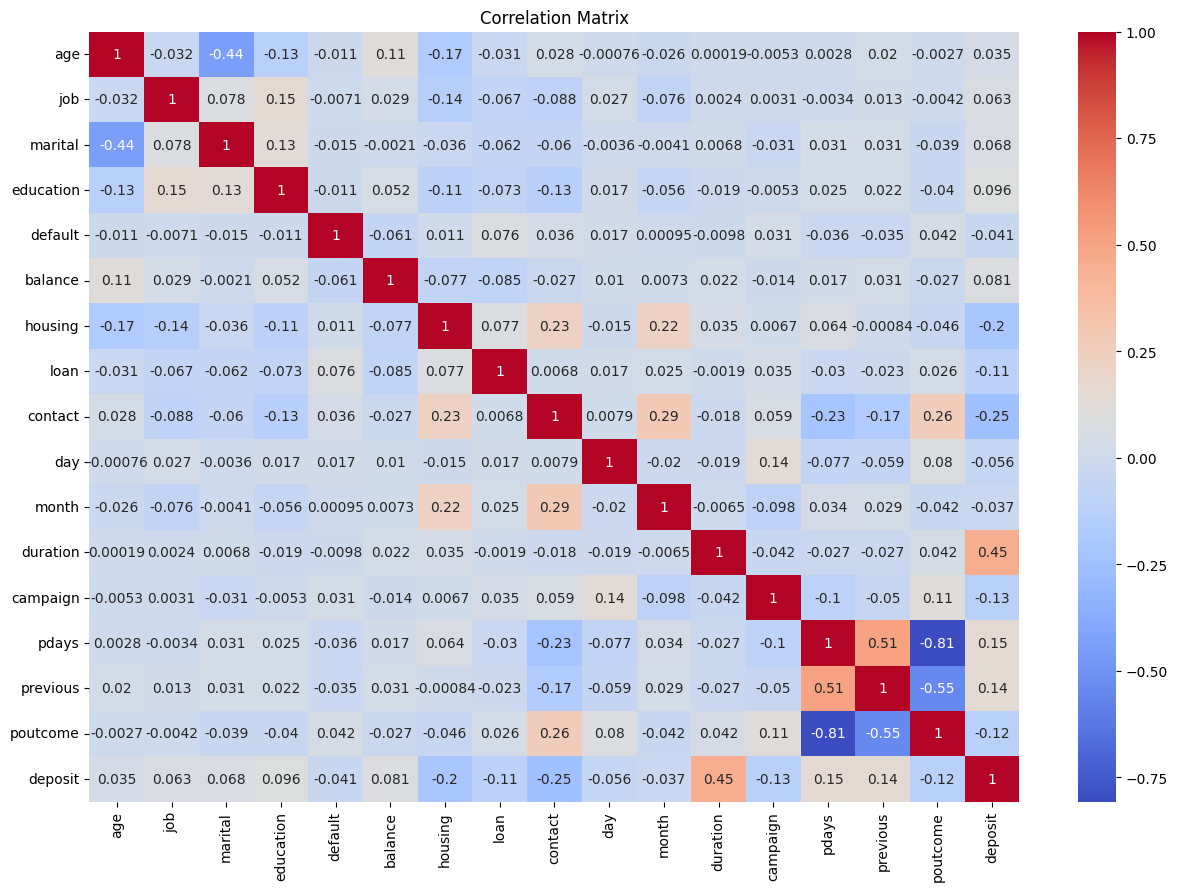

In [18]:
# Data Visualization

def plot_data_distributions(data):
    # Set the number of subplots
    num_cols = 3  # Number of columns in the subplot
    num_rows = (data.shape[1] // num_cols) + (data.shape[1] % num_cols > 0)  # Calculate rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Plot each feature's distribution
    for i, column in enumerate(data.columns):
        axes[i].hist(data[column], bins=30, alpha=0.7, color='blue')  # Adjust the number of bins
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    # Remove empty subplots if any
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig('data_distribution.png')
    plt.show()



def plot_categorical_distributions(data, column):
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.savefig(f'{column}_distribution.png')
    plt.show()

def plot_correlation_matrix(data):
    # Ensure all columns are numeric
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 10))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.show()

# Use the original data for visualizations
plot_data_distributions(original_data)

plot_categorical_distributions(original_data, 'deposit')

plot_correlation_matrix(original_data)
